# Objective: Make a model to predict the app rating, with other information about the app provided.

In [1]:
#importing libraray
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#1.Loading the data file using pandas. 
df=pd.read_csv("C:/Users/nawin/googleplaystore.csv")

In [3]:
#no of rows and columns
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
#2.Check for null values in the data. Get the number of null values for each column.
df.isnull().values.any()
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
#datatypes of columns
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
# 3.Droping records with nulls in any of the columns
df = df.dropna(axis = 0, how ='any')

In [8]:
#checking null values of df
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
df.shape

(9360, 13)

In [10]:
# 4.Fixing those Variables which seem to have incorrect type and inconsistent formatting.

In [11]:
#unique elements of category column
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [12]:
#unique elements of rating column
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [13]:
#changing datatype of Rating
df['Rating'] = df['Rating'].astype(float)
df['Rating'].dtype

dtype('float64')

In [14]:
# 4.a Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

df['Size'].replace(to_replace='Varies with device',value='',inplace=True)
df['Size'].replace(to_replace='Varies with device',value='',inplace=True)
df['Size']=df['Size'].apply(lambda a : a.replace(',',''))
df['Size']=df['Size'].apply(lambda a : a.replace('+',''))
df['Size'] = df.Size.apply(lambda x: x.replace('M', 'e+6'))# for converting the M to kil
df['Size'] = df.Size.apply(lambda x: x.replace('k', 'e+3'))# For convertinf the K to Kil
df['Size'] = pd.to_numeric(df['Size'])

In [15]:
# 4.b Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

df['Reviews'] = df.Reviews.replace("0.0",0)
df['Reviews'] = df.Reviews.replace("3.0M",3000000.0)
df['Reviews'] = df['Reviews'].astype(int)
df['Reviews'].dtype

dtype('int32')

In [16]:
# 4.c Installs field is currently stored as string and has values like 1,000,000+. Treat 1,000,000+ as 1,000,000
#remove ‘+’, ‘,’ from the field, convert it to integer

df['Installs'] = df.Installs.str.replace(",","")
df['Installs'] =df.Installs.str.replace("+","")
df['Installs'] =df.Installs.replace("Free",np.nan)
df['Installs'] =df['Installs'].astype(int)
df['Installs'].dtype

C:\Users\nawin\AppData\Local\Temp\ipykernel_28312\1692422923.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] =df.Installs.str.replace("+","")


dtype('int32')

In [17]:
#4.d Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.
df['Price'] = df.Price.replace("Everyone",np.nan)
df['Price'] = df.Price.str.replace("$","").astype(float)
df['Price'].dtype

C:\Users\nawin\AppData\Local\Temp\ipykernel_28312\3570593279.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df.Price.str.replace("$","").astype(float)


dtype('float64')

In [18]:
# changing datatype
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10834   2017-06-18
10836   2017-07-25
10837   2018-07-06
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9360, dtype: datetime64[ns]

In [19]:
df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10828,Manga-FR - Anime Vostfr,COMICS,3.4,291,13000000.0,10000,Free,0.0,Everyone,Comics,2017-05-15,2.0.1,4.0 and up
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7400000.0,10000,Free,0.0,Everyone,Books & Reference,2016-06-19,2.96,4.1 and up
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2300000.0,100000,Free,0.0,Everyone,News & Magazines,2014-01-20,1.5,1.6 and up
10832,FR Tides,WEATHER,3.8,1195,582000.0,100000,Free,0.0,Everyone,Weather,2014-02-16,6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000.0,1000,Free,0.0,Everyone,Books & Reference,2014-03-23,0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2600000.0,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000000.0,10000000,Free,0.0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device


In [20]:
# filling null values with mean
df.Size.fillna(value=df.Size.mean(),inplace=True)

In [21]:
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int32
Size                     float64
Installs                   int32
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [22]:
df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10828,Manga-FR - Anime Vostfr,COMICS,3.4,291,1.300000e+07,10000,Free,0.0,Everyone,Comics,2017-05-15,2.0.1,4.0 and up
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.400000e+06,10000,Free,0.0,Everyone,Books & Reference,2016-06-19,2.96,4.1 and up
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.300000e+06,100000,Free,0.0,Everyone,News & Magazines,2014-01-20,1.5,1.6 and up
10832,FR Tides,WEATHER,3.8,1195,5.820000e+05,100000,Free,0.0,Everyone,Weather,2014-02-16,6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,6.190000e+05,1000,Free,0.0,Everyone,Books & Reference,2014-03-23,0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.600000e+06,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,5.300000e+07,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000e+06,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,2.297046e+07,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,1.900000e+07,10000000,Free,0.0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device


In [23]:
#5. Sanity checks:

In [24]:
# 5 .a Average rating should be between 1 and 5 as only these values are allowed on the play store
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [25]:
# 5.b Reviews should not be more than installs as only those who installed can review the app.
#If there are any such records, drop them.

In [26]:
# to add new column , flag
df.assign(flag='yes').head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,flag
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,yes
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,yes
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,yes
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,yes
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,yes


In [27]:
# to compare 2 columns of installs and reviews 
df['flag'] = np.where(df['Reviews']<=df['Installs'], 'yes','no')
#unique values of flag
df['flag'].unique()

array(['yes', 'no'], dtype=object)

In [28]:
#deleting 'no' unique values
df =df[df.flag != 'no']
# checking unique values of flag
df['flag'].unique()

array(['yes'], dtype=object)

In [29]:
#displaying last ten rows
df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,flag
10828,Manga-FR - Anime Vostfr,COMICS,3.4,291,1.300000e+07,10000,Free,0.0,Everyone,Comics,2017-05-15,2.0.1,4.0 and up,yes
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.400000e+06,10000,Free,0.0,Everyone,Books & Reference,2016-06-19,2.96,4.1 and up,yes
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.300000e+06,100000,Free,0.0,Everyone,News & Magazines,2014-01-20,1.5,1.6 and up,yes
10832,FR Tides,WEATHER,3.8,1195,5.820000e+05,100000,Free,0.0,Everyone,Weather,2014-02-16,6.0,2.1 and up,yes
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,6.190000e+05,1000,Free,0.0,Everyone,Books & Reference,2014-03-23,0.8,2.2 and up,yes
10834,FR Calculator,FAMILY,4.0,7,2.600000e+06,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up,yes
10836,Sya9a Maroc - FR,FAMILY,4.5,38,5.300000e+07,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,yes
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000e+06,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,yes
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,2.297046e+07,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,yes
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,1.900000e+07,10000000,Free,0.0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device,yes


In [30]:
# deleting flag column
del df['flag']

In [31]:
#5.c For free apps (type = “Free”), the price should not be >0. Drop any such rows.
# checking the condition 
condition = (df['Type'] == 'Free') & (df['Price'] > 0)
df[condition]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [32]:
#5. Performing univariate analysis: 

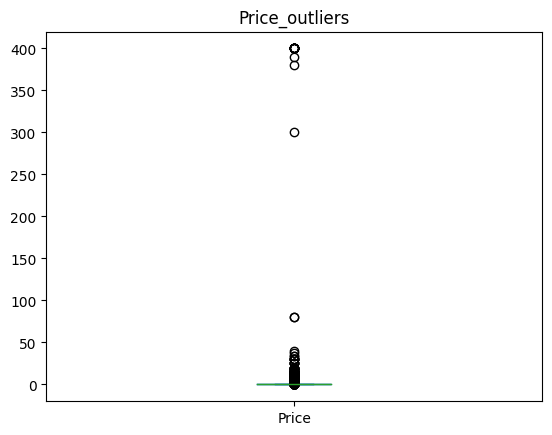

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000000.0,1000,Paid,79.99,Everyone,Medical,2018-06-18,19.0,4.0.3 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000000.0,1000,Paid,79.99,Everyone,Medical,2018-06-18,19.0,4.0.3 and up
4197,most expensive app (H),FAMILY,4.3,6,1500000.0,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800000.0,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700000.0,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600000.0,10000,Paid,299.99,Everyone,Lifestyle,2018-07-21,1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700000.0,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900000.0,1000,Paid,379.99,Everyone,Lifestyle,2018-07-01,1.0,4.0 and up


In [33]:
# 5 a. Boxplot for Price
df['Price'].plot(kind='box', title='Price_outliers')
plt.show()
#Are there any outliers?
# Yes there are outliers.
#Thinking about the price of usual apps on Play Store.
# usual price may be 79 , checking the condition
condition = (df['Price'] >=79)
df[condition]

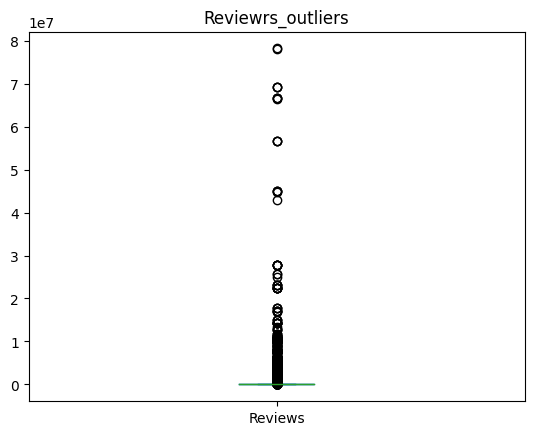

In [34]:
# 5 b. Boxplot for Reviews
df['Reviews'].plot(kind='box', title='Reviewrs_outliers')
plt.show()

#Are there any apps with very high number of reviews? Do the values seem right?
# observation : yes there are apps with very high number of reviews, the values doesnt seems to be correct.

(array([  17.,   18.,   41.,   74.,  137.,  445.,  879., 1660., 4172.,
        1910.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

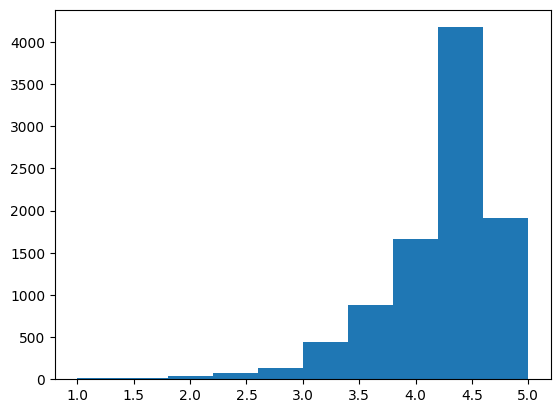

In [35]:
# 5 c. Histogram for Rating
plt.hist(df['Rating'])

#How are the ratings distributed? Is it more toward higher ratings?
# yes, ratings are more towards higher ratings.

(array([3245., 1398., 2627.,  606.,  449.,  325.,  226.,  161.,  117.,
         199.]),
 array([8.500000e+03, 1.000765e+07, 2.000680e+07, 3.000595e+07,
        4.000510e+07, 5.000425e+07, 6.000340e+07, 7.000255e+07,
        8.000170e+07, 9.000085e+07, 1.000000e+08]),
 <BarContainer object of 10 artists>)

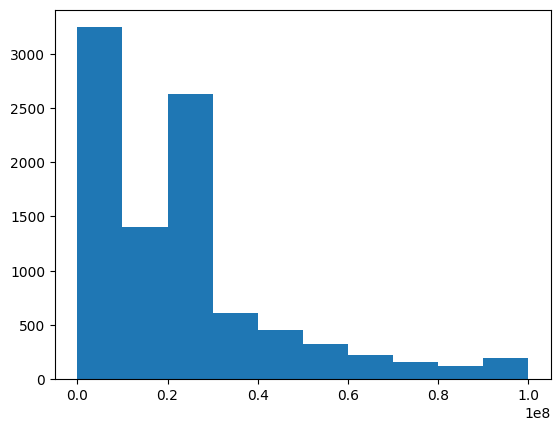

In [36]:
# 5 d. Histogram for size
plt.hist(df['Size'])
#observation : most of the apps are smaller in size

In [37]:
#Outlier treatment: 

In [38]:
# 6. 1.Price: From the box plot, it seems like there are some apps with very high price. 
#A price of $200 for an application on the Play Store is very high and suspicious!
#Check out the records with very high price
#Is 200 indeed a high price?
#Drop these as most seem to be junk apps

condition = (df['Price'] >=200)
df[condition]
#yes, 200 is indeed a high price, so, checking with price>=79
condition = (df['Price'] >=79)
df[condition]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000000.0,1000,Paid,79.99,Everyone,Medical,2018-06-18,19.0,4.0.3 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000000.0,1000,Paid,79.99,Everyone,Medical,2018-06-18,19.0,4.0.3 and up
4197,most expensive app (H),FAMILY,4.3,6,1500000.0,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800000.0,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700000.0,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600000.0,10000,Paid,299.99,Everyone,Lifestyle,2018-07-21,1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700000.0,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900000.0,1000,Paid,379.99,Everyone,Lifestyle,2018-07-01,1.0,4.0 and up


In [39]:
#6. 2. get names of indexes for which column price has value >=79 and dropping those
index_names = df[ df['Price'] >= 79].index
  
# drop these row indexes from dataFrame
df.drop(index_names, inplace = True)
# checking the dataframe last ten columns
df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10828,Manga-FR - Anime Vostfr,COMICS,3.4,291,1.300000e+07,10000,Free,0.0,Everyone,Comics,2017-05-15,2.0.1,4.0 and up
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.400000e+06,10000,Free,0.0,Everyone,Books & Reference,2016-06-19,2.96,4.1 and up
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.300000e+06,100000,Free,0.0,Everyone,News & Magazines,2014-01-20,1.5,1.6 and up
10832,FR Tides,WEATHER,3.8,1195,5.820000e+05,100000,Free,0.0,Everyone,Weather,2014-02-16,6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,6.190000e+05,1000,Free,0.0,Everyone,Books & Reference,2014-03-23,0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.600000e+06,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,5.300000e+07,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000e+06,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,2.297046e+07,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,1.900000e+07,10000000,Free,0.0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device


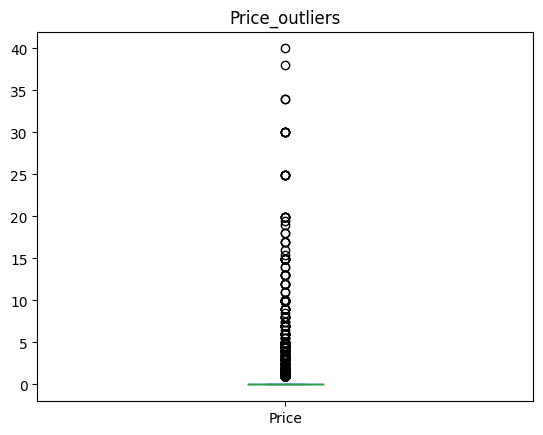

In [40]:
# Price box plot 
df['Price'].plot(kind='box', title='Price_outliers')
plt.show()

In [41]:
# 6. 2. get names of indexes for which column reviews has value >=2000000
index_names = df[ df['Reviews'] >= 2000000].index
  
# drop these row indexes from dataFrame
df.drop(index_names, inplace = True)
df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10828,Manga-FR - Anime Vostfr,COMICS,3.4,291,1.300000e+07,10000,Free,0.0,Everyone,Comics,2017-05-15,2.0.1,4.0 and up
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.400000e+06,10000,Free,0.0,Everyone,Books & Reference,2016-06-19,2.96,4.1 and up
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.300000e+06,100000,Free,0.0,Everyone,News & Magazines,2014-01-20,1.5,1.6 and up
10832,FR Tides,WEATHER,3.8,1195,5.820000e+05,100000,Free,0.0,Everyone,Weather,2014-02-16,6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,6.190000e+05,1000,Free,0.0,Everyone,Books & Reference,2014-03-23,0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.600000e+06,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,5.300000e+07,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000e+06,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,2.297046e+07,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,1.900000e+07,10000000,Free,0.0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device


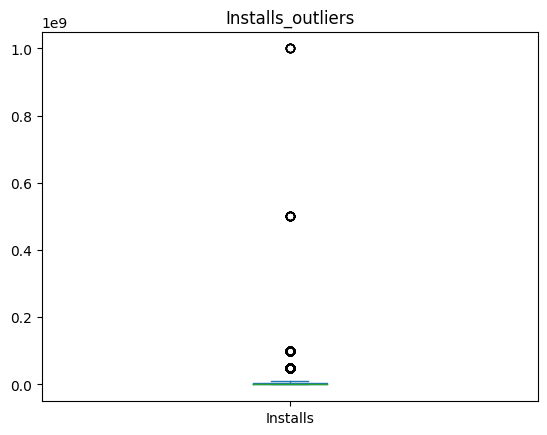

In [42]:
#6.3 Installs:  There seems to be some outliers in this field too. 
#outlier box plot

df['Installs'].plot(kind='box', title='Installs_outliers')
plt.show()



In [43]:
# 6.3 Apps having very high number of installs should be dropped from the analysis
# get names of indexes for which
# column reviews has value >=1000000

# Decide a threshold as cutoff for outlier and drop records having values more than that
# threshold is > 1000000 
index_names = df[ df['Installs'] > 1000000].index
  
# drop these row indexes
# from dataFrame
df.drop(index_names, inplace = True)

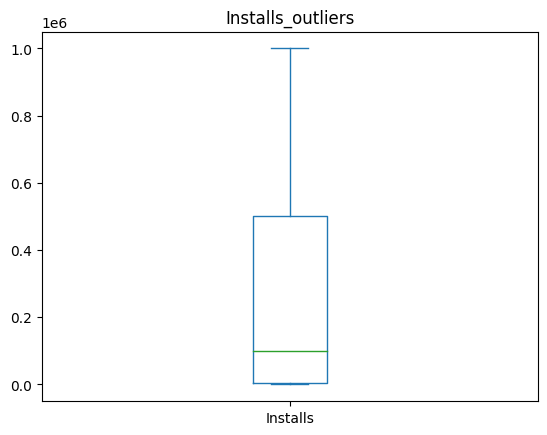

In [44]:
#outlier box plot after dropping high number of installs
df['Installs'].plot(kind='box', title='Installs_outliers')
plt.show()



In [45]:
# 6.3 Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
print(np.percentile(df["Installs"],[0.1,0.25,0.5,0.7,0.9,0.95,0.99]))

[ 5. 10. 10. 10. 10. 10. 10.]


In [46]:
#Bivariate analysis:

C:\Users\nawin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1254: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


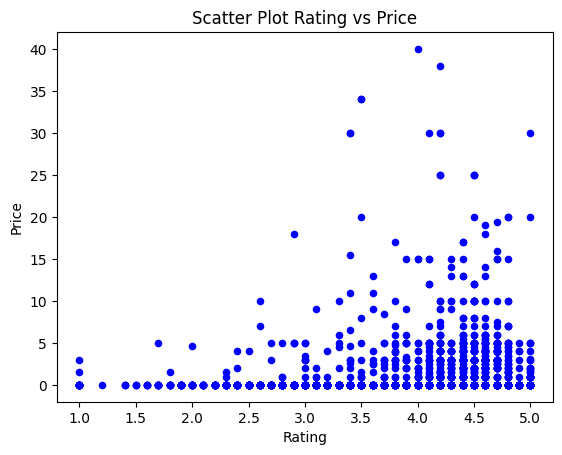

In [47]:
#7.1 Making scatter plot/joinplot for Rating vs. Price
df.plot(x='Rating', y='Price', kind='scatter',c='b',title='Scatter Plot Rating vs Price', xlabel='Rating', ylabel='Price')
plt.show()

#What pattern do you observe? Does rating increase with price?
#observation: no, the rating does not increase with price.

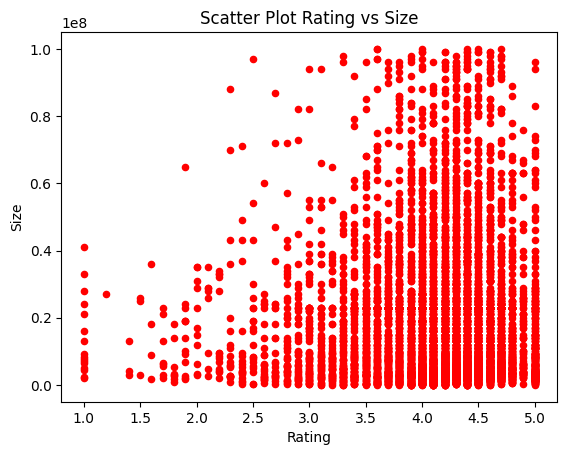

In [48]:
# 7.2 Making scatter plot for Rating vs. Size
df.plot(x='Rating', y='Size', kind='scatter',c='r',title='Scatter Plot Rating vs Size', xlabel='Rating', ylabel='Size')
plt.show()
#Are heavier apps rated better? 
# no, heavier apps are not rated better

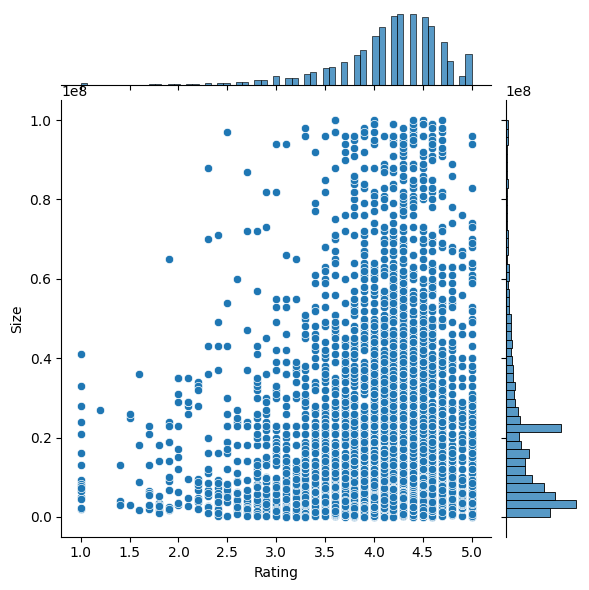

In [49]:
# 7.2 Making scatter joinplot for Rating vs. Size
sns.jointplot(x = "Rating", y = "Size",kind = "scatter", data = df)
# show the plot
plt.show()
#Are heavier apps rated better? 
# no,heavier apps are not rated better

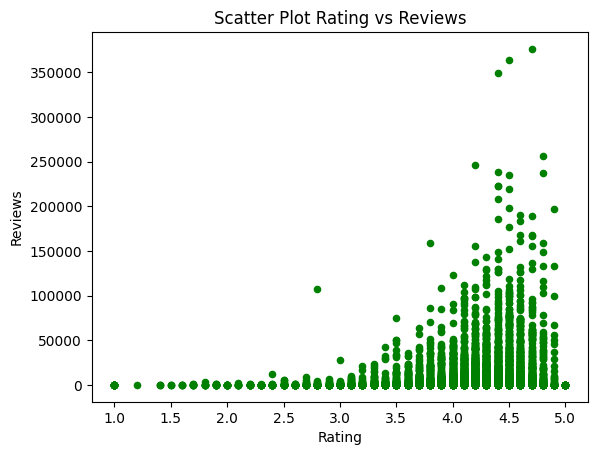

In [50]:
# 7 .3 Making scatter plot/joinplot for Rating vs. Reviews
df.plot(x='Rating', y='Reviews', kind='scatter',c='g',title='Scatter Plot Rating vs Reviews', xlabel='Rating', ylabel='Reviews')
plt.show()
#Does more review mean a better rating always
# yes, more review  mean a better rating always 

<AxesSubplot: xlabel='Content Rating', ylabel='Rating'>

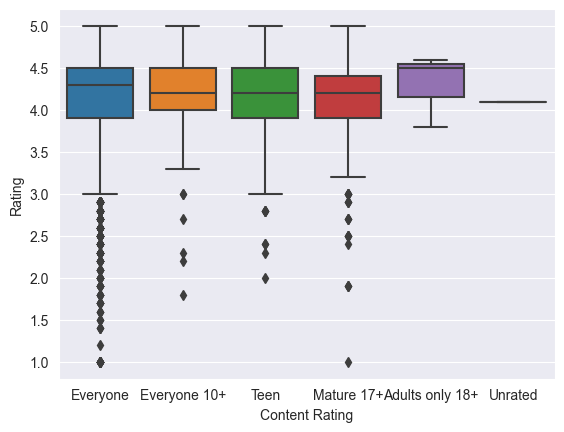

In [51]:
#7.4 Make boxplot for Rating vs. Content Rating
sns.set_style("darkgrid")
sns.boxplot(x = 'Content Rating', y = 'Rating', data = df)
#Is there any difference in the ratings? Are some types liked better?
#yes, there are differences in ratings, yes , some types are liked better

<AxesSubplot: xlabel='Rating', ylabel='Category'>

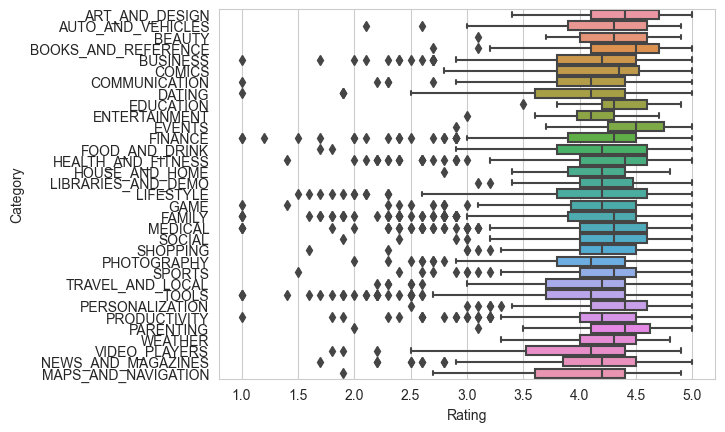

In [52]:
#7.5 Make boxplot for Ratings vs. Category
sns.set_style("whitegrid")
sns.boxplot(x = 'Rating', y = 'Category', data = df)
#Which genre has the best ratings?
# Events has the best ratings

In [53]:
# data preprocessing

In [54]:
#create a copy of the dataframe to make all the edits. Name it inp1
inp1=df.copy(deep=True)

In [55]:
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,1.900000e+07,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,1.400000e+07,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000e+06,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.600000e+06,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,1.900000e+07,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,6.190000e+05,1000,Free,0.0,Everyone,Books & Reference,2014-03-23,0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.600000e+06,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,5.300000e+07,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000e+06,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up


In [56]:
#displaying columns
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000000.0,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up


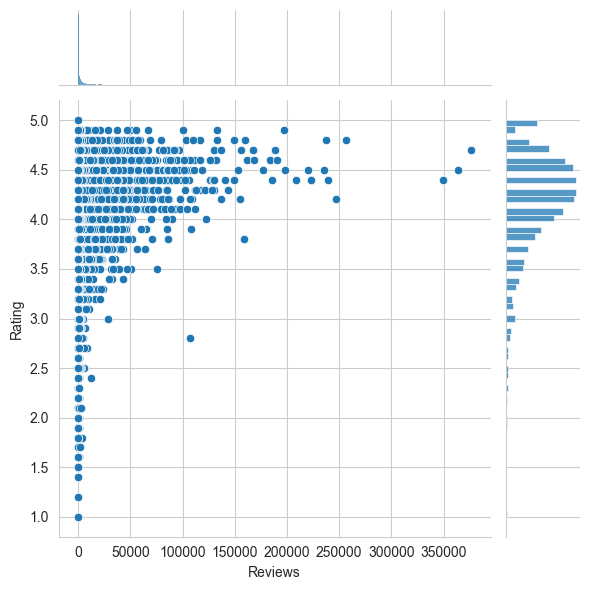

In [57]:
#transformation of variables 
sns.jointplot(x='Reviews',y='Rating' ,data=df) 

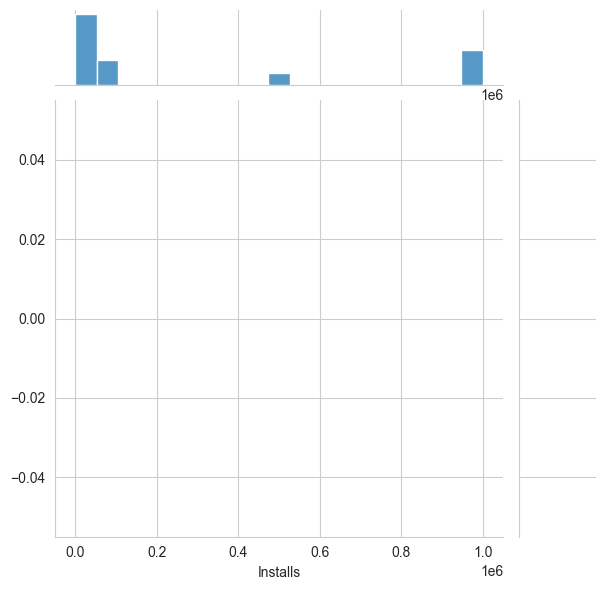

In [58]:
#transformation of variables
sns.jointplot(x='Installs', data=df)

In [59]:
#8.1 Reviews and Install have some values that are still relatively very high.
#Before building a linear regression model, you need to reduce the skew. 
#Apply log transformation (np.log1p) to Reviews and Installs.
df.Reviews=np.log(1+df.Reviews)
df.Installs=np.log(1+df.Installs)

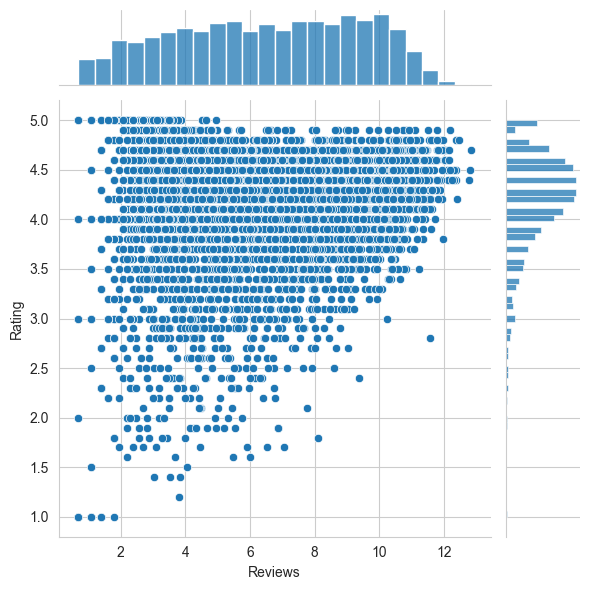

In [60]:
#transformation of variables
sns.jointplot(x='Reviews',y='Rating' ,data=df)

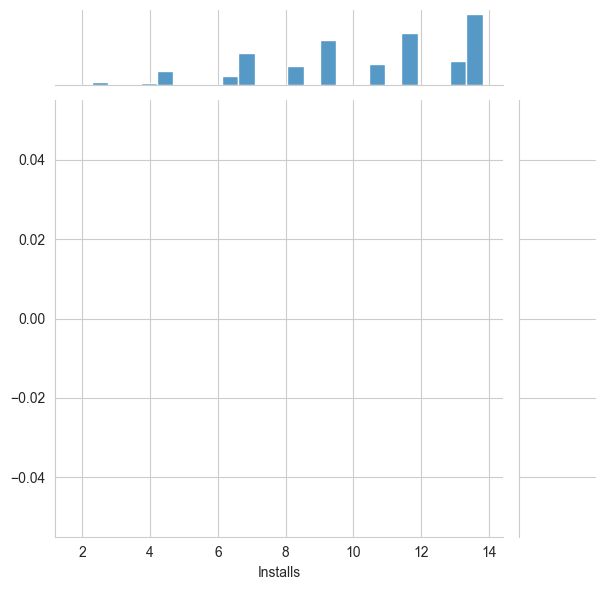

In [61]:
sns.jointplot(x='Installs', data=df)

In [62]:
#copying of data
inp1=df.copy(deep=True)

In [63]:
# 8.2 Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.
del inp1['App']
del inp1['Last Updated']
del inp1['Current Ver']
del inp1['Android Ver']

In [64]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
4,ART_AND_DESIGN,4.3,6.875232,2800000.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600000.0,10.819798,Free,0.0,Everyone,Art & Design
6,ART_AND_DESIGN,3.8,5.187386,19000000.0,10.819798,Free,0.0,Everyone,Art & Design


In [65]:
#Get dummy columns for Category, Genres, and Content Rating. 
#This needs to be done as the models do not understand categorical data, and all data should be numeric. 
#Dummy encoding is one way to convert character fields to numeric. 
inp1=pd.get_dummies(inp1)

In [66]:
#displaying dummy categories
inp1.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Strategy;Action & Adventure,Genres_Strategy;Creativity,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,4.1,5.075174,19000000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800000.0,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600000.0,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3.8,5.187386,19000000.0,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6504 entries, 0 to 10839
Columns: 154 entries, Rating to Genres_Word
dtypes: float64(5), uint8(149)
memory usage: 1.2 MB


In [68]:
#Name of dataframe should be inp2.
inp2=inp1.copy(deep=True)

In [69]:
#correlation of variables
inp2.corr()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Strategy;Action & Adventure,Genres_Strategy;Creativity,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
Rating,1.000000,0.118383,0.028702,0.000007,0.035140,0.035177,0.006605,0.019034,0.048065,-0.015915,...,0.013877,0.005555,0.007683,-0.085511,-0.028082,-0.000831,-0.011913,-0.046417,0.013791,0.009445
Reviews,0.118383,1.000000,0.243685,0.924126,-0.067956,-0.011378,-0.009325,-0.008598,-0.022922,-0.075006,...,0.020521,0.022577,0.004793,-0.066931,-0.001104,0.001186,-0.004846,0.008850,0.058399,0.010354
Size,0.028702,0.243685,1.000000,0.207918,0.026087,-0.036195,0.009770,-0.012682,-0.038051,-0.045591,...,0.024512,0.026970,0.013911,-0.166765,0.041304,-0.007482,-0.005502,-0.029312,-0.028493,0.007009
Installs,0.000007,0.924126,0.207918,1.000000,-0.152860,0.009046,0.007286,0.011869,-0.015523,-0.072822,...,0.013236,0.014205,0.011287,-0.043408,0.014125,0.004513,-0.006394,0.021227,0.054139,0.001526
Price,0.035140,-0.067956,0.026087,-0.152860,1.000000,-0.013961,-0.020025,-0.016383,-0.018800,-0.014579,...,0.012425,-0.002583,-0.002583,-0.009972,-0.011743,-0.002583,-0.012674,-0.019693,0.005059,-0.008572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Genres_Travel & Local;Action & Adventure,-0.000831,0.001186,-0.007482,0.004513,-0.002583,-0.001113,-0.001275,-0.000975,-0.001819,-0.002490,...,-0.000217,-0.000154,-0.000154,-0.003750,-0.001805,1.000000,-0.000755,-0.001534,-0.001102,-0.000510
Genres_Trivia,-0.011913,-0.004846,-0.005502,-0.006394,-0.012674,-0.005464,-0.006256,-0.004787,-0.008927,-0.012218,...,-0.001067,-0.000755,-0.000755,-0.018405,-0.008860,-0.000755,1.000000,-0.007527,-0.005410,-0.002505
Genres_Video Players & Editors,-0.046417,0.008850,-0.029312,0.021227,-0.019693,-0.011104,-0.012714,-0.009730,-0.018143,-0.024832,...,-0.002169,-0.001534,-0.001534,-0.037405,-0.018007,-0.001534,-0.007527,1.000000,-0.010996,-0.005091
Genres_Weather,0.013791,0.058399,-0.028493,0.054139,0.005059,-0.007981,-0.009138,-0.006993,-0.013041,-0.017848,...,-0.001559,-0.001102,-0.001102,-0.026885,-0.012943,-0.001102,-0.005410,-0.010996,1.000000,-0.003659


In [70]:
#importing statsmodel
import statsmodels.api as sn
from sklearn.linear_model import LinearRegression

In [71]:
#Separate the dataframes into X_train, y_train, X_test, and y_test.
y=inp2['Rating']
X=inp2['Reviews']

In [72]:
#adding a constanst
X_cons =sn.add_constant(inp2['Reviews'])

In [73]:
#ordinary least square
# name of model is OLS and object is lm
lm=sn.OLS(inp2['Rating'],X).fit()

In [74]:
# model summary
lm.summary()
# R-Square is the proportional of variance explained
# R-square =0.832
# F-statistic value is very less

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.832
Model:                            OLS   Adj. R-squared (uncentered):              0.832
Method:                 Least Squares   F-statistic:                          3.217e+04
Date:                Wed, 12 Oct 2022   Prob (F-statistic):                        0.00
Time:                        20:56:50   Log-Likelihood:                         -12733.
No. Observations:                6504   AIC:                                  2.547e+04
Df Residuals:                    6503   BIC:                                  2.548e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Reviews        0.5349      0.003    179.361      0.000       0.529       0.541
==============================================================================
Omnibus:                      432.215   Durbin-Watson:                   1.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.705
Skew:                           0.424   Prob(JB):                     6.82e-67
Kurtosis:                       2.362   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

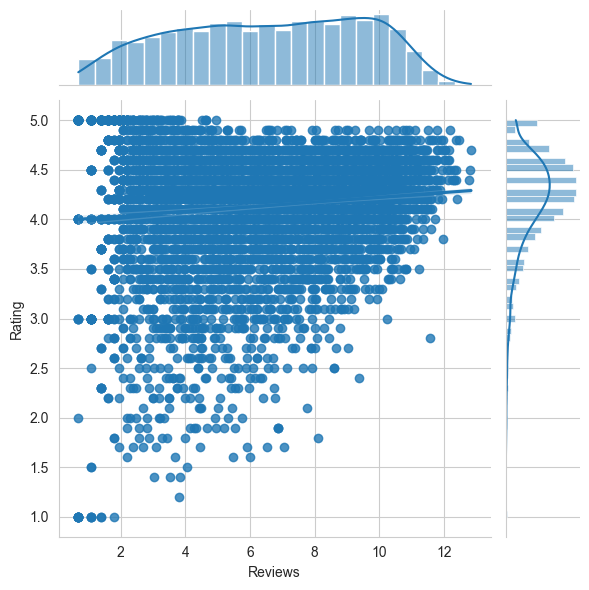

In [75]:
# jointplot between rating and reviews
sns.jointplot(x=df['Reviews'], y =inp2['Rating'], data=df , kind="reg")

In [76]:
# dropping rating column
X_multi=inp2.drop('Rating', axis=1)

In [77]:
# displaying columns
X_multi.head()

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Strategy;Action & Adventure,Genres_Strategy;Creativity,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,5.075174,19000000.0,9.210440,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.875232,14000000.0,13.122365,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.875232,2800000.0,11.512935,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5.123964,5600000.0,10.819798,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5.187386,19000000.0,10.819798,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# adding constanst
X_multi_cons =sn.add_constant(X_multi)

In [79]:
X_multi_cons.head()

,const,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Strategy;Action & Adventure,Genres_Strategy;Creativity,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,1.0,5.075174,19000000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,6.875232,14000000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,6.875232,2800000.0,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,5.123964,5600000.0,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1.0,5.187386,19000000.0,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
y_multi= df['Rating']

In [81]:
#importing library
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [82]:
# 9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.
#dividing the data into testing and training , testing data has 20 percent so 0.2
X_train , X_test , y_train , y_test =train_test_split(X_multi, y_multi, test_size=0.2 ,random_state=0)

In [83]:
# printing the number of rows and columns
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5203, 153) (1301, 153) (5203,) (1301,)


In [84]:
#Model building
#Use linear regression as the technique
# object is lm_a
lm_a=LinearRegression()

In [85]:
# fit the model on training set
lm_a.fit(X_train,y_train)

LinearRegression()

In [86]:
# predicted value of training set
y_train_a= lm_a.predict(X_train)

In [87]:
#predicted value of y using this model
y_test_a= lm_a.predict(X_test)

In [88]:
#R2 value on training set
r2_score(y_train, y_train_a)

0.14676734434321048

In [89]:
# Make predictions on test set and report R2.
#R2 value on training set
r2_score(y_test, y_test_a)

0.11334887673236149

In [90]:
#R2 vakue on test data is important to evaluate the performance of the model.

In [92]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')